In [2]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, Dense, LSTM

In [8]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
max_len = 500

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [10]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 251s - loss: 0.5790 - acc: 0.7067 - val_loss: 0.4655 - val_acc: 0.8106
Epoch 2/10
20000/20000 [==============================] - 265s - loss: 0.3593 - acc: 0.8550 - val_loss: 0.3152 - val_acc: 0.8716
Epoch 3/10
20000/20000 [==============================] - 260s - loss: 0.2634 - acc: 0.9006 - val_loss: 0.3007 - val_acc: 0.8694
Epoch 4/10
20000/20000 [==============================] - 265s - loss: 0.2183 - acc: 0.9202 - val_loss: 0.3953 - val_acc: 0.8248
Epoch 5/10
20000/20000 [==============================] - 266s - loss: 0.1924 - acc: 0.9289 - val_loss: 0.2863 - val_acc: 0.8862
Epoch 6/10
20000/20000 [==============================] - 276s - loss: 0.1672 - acc: 0.9390 - val_loss: 0.3041 - val_acc: 0.8824
Epoch 7/10
20000/20000 [==============================] - 264s - loss: 0.1526 - acc: 0.9464 - val_loss: 0.3222 - val_acc: 0.8636
Epoch 8/10
20000/20000 [========================

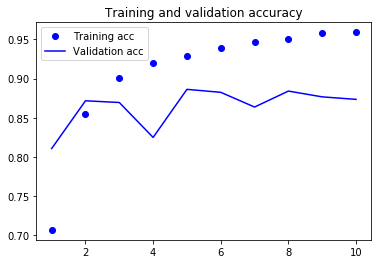

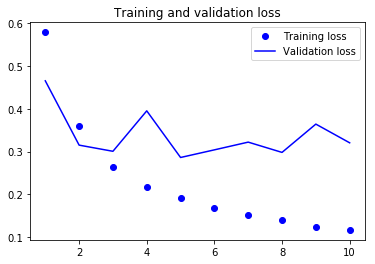

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()